<a href="https://colab.research.google.com/github/Hengameh1392/Health/blob/main/Hadian-%20Principal_Component_Analysis_apple8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [ ]:
!pip install pycaret==2.3.6


**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification. 
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [3]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Hengameh1392/Health/main/applerevenue%2011.csv')
df.head(25)

date     open     high      low    close  Close-Open     volume  \
0     2,1,2019  37.4340  38.3910  37.2745  38.1663      0.7323  148158948   
1     3,1,2019  34.7972  35.2178  34.3187  34.3646     -0.4326  365248780   
2     4,1,2019  34.9302  35.9017  34.7537  35.8316      0.9014  234428280   
3     7,1,2019  35.9380  35.9694  35.2613  35.7519     -0.1861  219111056   
4     8,1,2019  36.1458  36.6920  35.8945  36.4334      0.2876  164101256   
5     9,1,2019  36.5639  37.3470  36.1627  37.0521      0.4882  180396324   
6    10,1,2019  36.8564  37.2116  36.4600  37.1705      0.3141  143122680   
7    11,1,2019  36.9482  37.1464  36.6171  36.8056     -0.1426  108092964   
8   14,01,2019  36.4576  36.5591  36.0636  36.2521     -0.2055  129756744   
9   15,01,2019  36.3174  37.0714  36.2642  36.9941      0.6767  114841296   
10  16,01,2019  36.9965  37.6732  36.9772  37.4461      0.4496  122278824   
11  17,01,2019  37.2672  38.1034  37.0400  37.6684      0.4012  119284640   
12  18,01,2019  38.0648  38.1566  37.6975  37.9004     -0.1644  135004092   
13  22,01,2019  37.8013  37.8787  36.8854  37.0497     -0.7516  121575880   
14  23,01,2019  37.2551  37.4944  36.6630  37.1995     -0.0556   92522280   
15  24,01,2019  37.2455  37.3349  36.6727  36.9047     -0.3408  101766196   
16  25,01,2019  37.5766  38.2170  37.2962  38.1276      0.5510  134191572   
17  28,01,2019  37.6515  37.7820  37.1367  37.7747      0.1232  104768232   
18  29,01,2019  37.7627  38.2170  37.2455  37.3832     -0.3795  166348956   
19  30,01,2019  39.4544  40.1553  38.7245  39.9378      0.4834  244439120   
20  31,01,2019  40.1456  40.8441  39.7710  40.2254      0.0798  162958596   
21    1,2,2019  40.3511  40.8393  40.1021  40.2447     -0.1064  130672552   
22    4,2,2019  40.4598  41.4858  40.4284  41.3879      0.9281  125982328   
23    5,2,2019  41.7770  42.3135  41.6537  42.0960      0.3190  144406512   
24    6,2,2019  42.2096  42.4319  41.7753  42.1105     -0.0991  112958364   

         SMA7  profit or not  
0   37.383571              0  
1   37.088714              1  
2   37.138086              0  
3   36.819071              1  
4   36.632629              0  
5   36.531814              0  
6   36.395771              0  
7   36.201386              1  
8   36.471029              1  
9   36.637100              0  
10  36.879129              0  
11  37.055557              0  
12  37.176743              1  
13  37.159486              1  
14  37.215757              1  
15  37.308986              1  
16  37.470914              0  
17  37.517857              0  
18  37.477114              1  
19  37.768171              0  
20  38.221843              0  
21  38.656871              1  
22  39.297329              0  
23  39.864243              0  
24  40.483643              1

In [4]:
len(df.index)

965

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           965 non-null    object 
 1   open           965 non-null    float64
 2   high           965 non-null    float64
 3   low            965 non-null    float64
 4   close          965 non-null    float64
 5   Close-Open     965 non-null    float64
 6   volume         965 non-null    int64  
 7   SMA7           965 non-null    float64
 8   profit or not  965 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 68.0+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

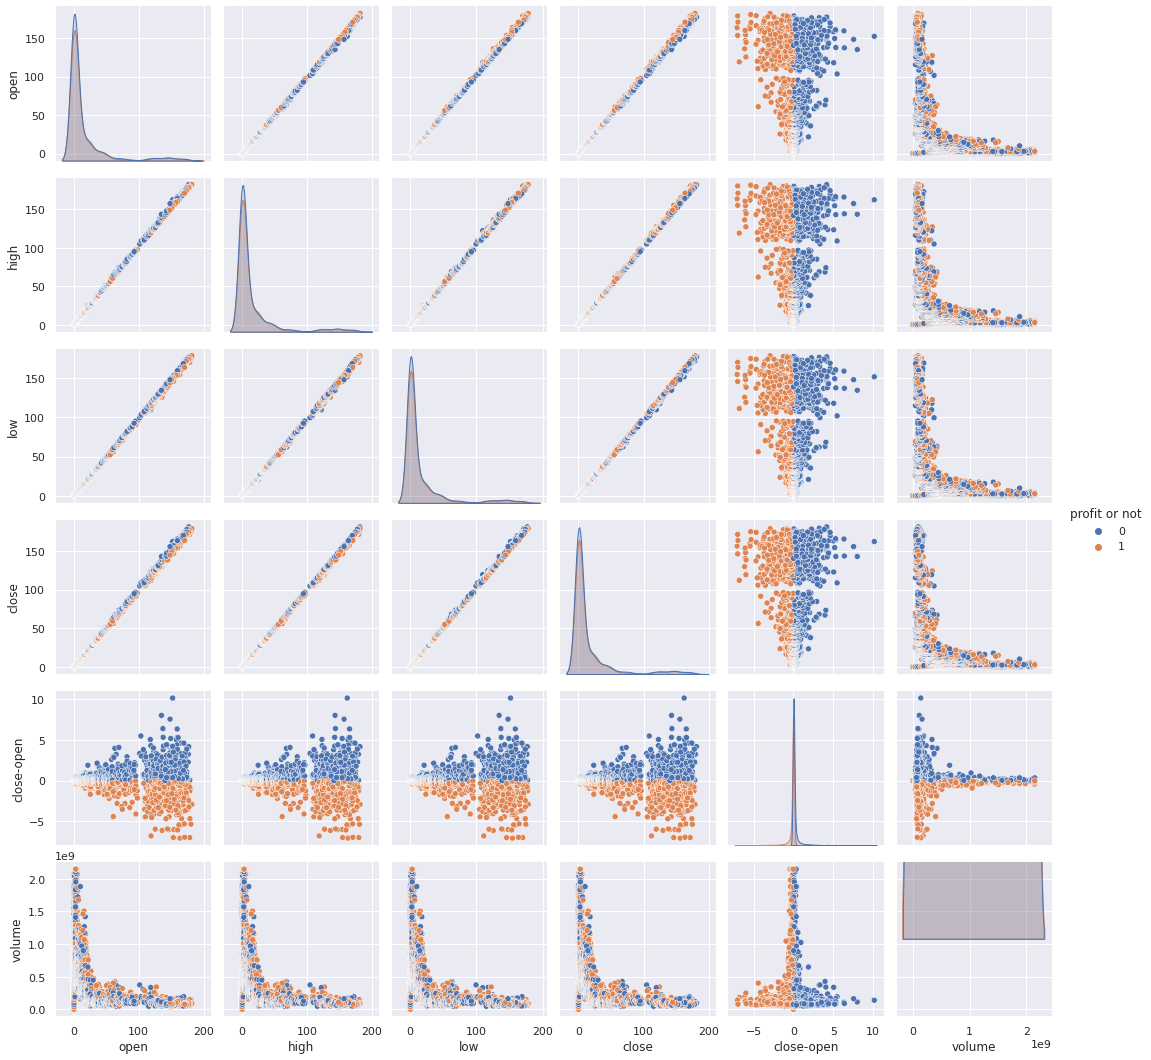

In [ ]:
sns.pairplot(df, hue='profit or not')
plt.show()

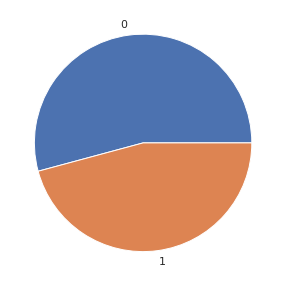

In [4]:
y =df['profit or not']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [5]:
X = df.drop(columns=['profit or not', 'date'])
X.head(10)

open     high      low    close  Close-Open     volume       SMA7
0  37.4340  38.3910  37.2745  38.1663      0.7323  148158948  37.383571
1  34.7972  35.2178  34.3187  34.3646     -0.4326  365248780  37.088714
2  34.9302  35.9017  34.7537  35.8316      0.9014  234428280  37.138086
3  35.9380  35.9694  35.2613  35.7519     -0.1861  219111056  36.819071
4  36.1458  36.6920  35.8945  36.4334      0.2876  164101256  36.632629
5  36.5639  37.3470  36.1627  37.0521      0.4882  180396324  36.531814
6  36.8564  37.2116  36.4600  37.1705      0.3141  143122680  36.395771
7  36.9482  37.1464  36.6171  36.8056     -0.1426  108092964  36.201386
8  36.4576  36.5591  36.0636  36.2521     -0.2055  129756744  36.471029
9  36.3174  37.0714  36.2642  36.9941      0.6767  114841296  36.637100

In [6]:
X.describe().transpose()

count          mean           std           min           25%  \
open        965.0  1.082633e+02  4.391663e+01  3.479720e+01  6.444900e+01   
high        965.0  1.096058e+02  4.445724e+01  3.521780e+01  6.520210e+01   
low         965.0  1.070133e+02  4.335585e+01  3.431870e+01  6.399020e+01   
close       965.0  1.083732e+02  4.391775e+01  3.436460e+01  6.454500e+01   
Close-Open  965.0  1.098417e-01  1.923871e+00 -7.059900e+00 -6.723000e-01   
volume      965.0  1.129207e+08  5.359624e+07  4.084055e+07  7.809394e+07   
SMA7        965.0  1.080225e+02  4.396521e+01  3.620139e+01  6.479240e+01   

                     50%           75%           max  
open        1.198738e+02  1.459425e+02  1.818779e+02  
high        1.218266e+02  1.477645e+02  1.821866e+02  
low         1.182233e+02  1.447986e+02  1.783824e+02  
close       1.199729e+02  1.461000e+02  1.812605e+02  
Close-Open  1.279000e-01  1.039300e+00  1.013100e+01  
volume      9.839056e+07  1.297725e+08  4.268849e+08  
SMA7        1.201315e+02  1.456985e+02  1.787580e+02

**Standardize the Data**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

open      high       low     close  Close-Open    volume      SMA7
0 -1.613650 -1.602701 -1.609355 -1.599428    0.323712  0.657816 -1.607533
1 -1.673722 -1.674115 -1.677566 -1.686037   -0.282099  4.710384 -1.614243
2 -1.670692 -1.658724 -1.667528 -1.652617    0.411654  2.268266 -1.613119
3 -1.647732 -1.657200 -1.655814 -1.654432   -0.153906  1.982329 -1.620379
4 -1.642998 -1.640938 -1.641202 -1.638907    0.092444  0.955423 -1.624622
5 -1.633473 -1.626197 -1.635012 -1.624812    0.196767  1.259614 -1.626916
6 -1.626809 -1.629244 -1.628152 -1.622114    0.106226  0.563801 -1.630012
7 -1.624718 -1.630711 -1.624526 -1.630427   -0.131283 -0.090123 -1.634436
8 -1.635895 -1.643929 -1.637299 -1.643037   -0.163995  0.314289 -1.628300
9 -1.639089 -1.632399 -1.632670 -1.626133    0.294797  0.035852 -1.624520

In [16]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
open        965.0  0.000000e+00  1.000519 -1.673722 -0.998188  0.264512   
high        965.0 -1.178102e-16  1.000519 -1.674115 -0.999313  0.275032   
low         965.0 -5.890510e-17  1.000519 -1.677566 -0.992840  0.258692   
close       965.0  0.000000e+00  1.000519 -1.686037 -0.998478  0.264261   
Close-Open  965.0  7.363137e-18  1.000519 -3.728658 -0.406757  0.009391   
volume      965.0  0.000000e+00  1.000519 -1.345571 -0.650136 -0.271245   
SMA7        965.0  5.890510e-17  1.000519 -1.634436 -0.983789  0.275567   

                 75%       max  
open        0.858415  1.677103  
high        0.858770  1.633445  
low         0.871968  1.646978  
close       0.859479  1.660493  
Close-Open  0.483369  5.211551  
volume      0.314583  5.860989  
SMA7        0.857395  1.609732

**Observations and variables**

In [22]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

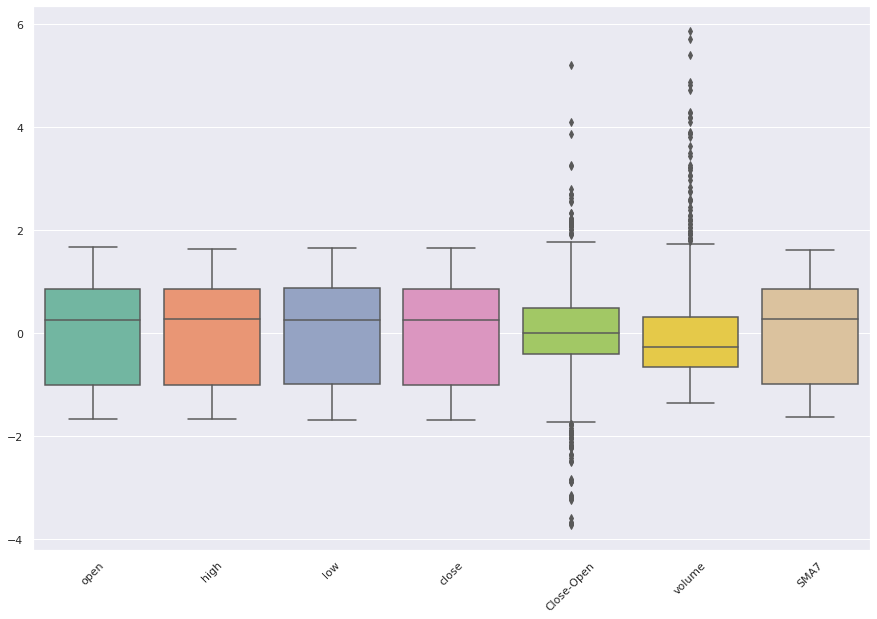

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

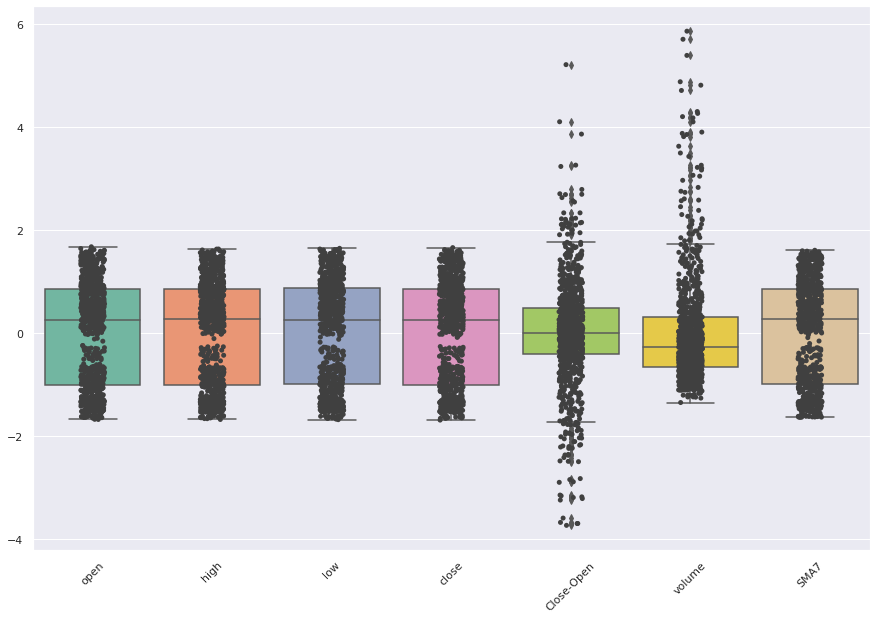

In [12]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

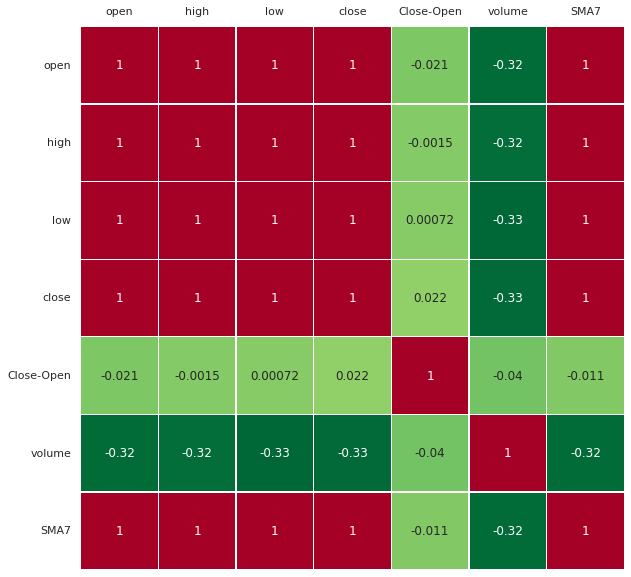

In [18]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

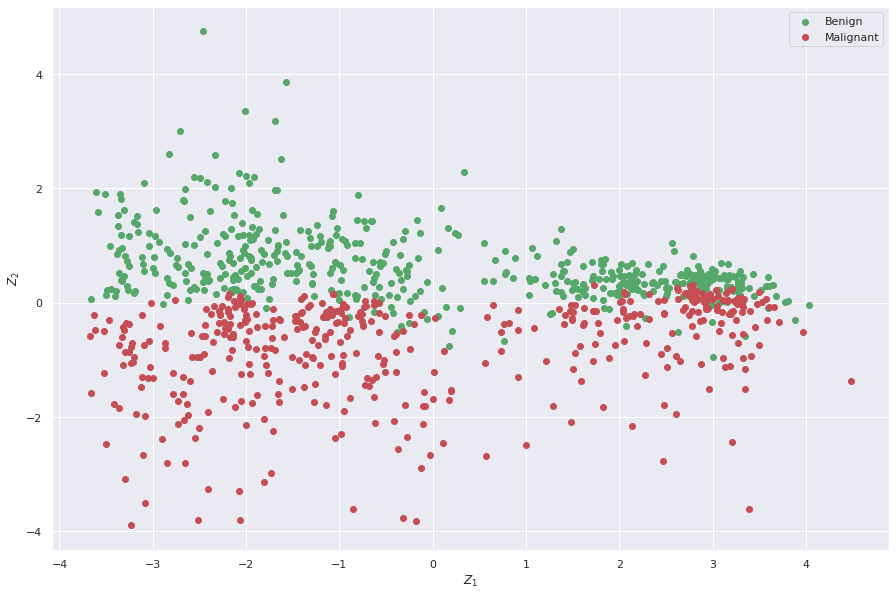

In [19]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-4.40541495e-01, -3.97188087e-02,  6.82439813e-02,
        -2.22276496e-01,  7.76601190e-02,  4.94714466e-01,
        -7.06758820e-01],
       [-4.40314497e-01, -2.31217608e-02,  8.35792335e-02,
        -1.63132733e-01,  6.58145364e-01, -5.82095723e-01,
        -1.08243401e-15],
       [-4.40901858e-01, -1.59197539e-02,  6.35729661e-02,
        -2.84742438e-01, -7.40645595e-01, -4.14338553e-01,
         5.05380542e-17],
       [-4.40553004e-01,  2.37770069e-03,  8.02808351e-02,
        -2.21839730e-01,  7.76597923e-02,  4.94656550e-01,
         7.06776749e-01],
       [-5.17844867e-04,  9.60947584e-01,  2.74814376e-01,
         9.84167868e-03,  3.75118894e-05, -1.03560699e-03,
        -3.09612329e-02],
       [ 1.73089289e-01, -2.70629526e-01,  9.46866205e-01,
        -6.11131818e-03, -1.43222422e-02,  1.29342663e-03,
        -2.35328510e-17],
       [-4.40005416e-01, -3.11144315e-02,  7.61064075e-02,
         8.90817345e-01, -7.75984344e-02,  7.60799535e-03,
        -7.6362227

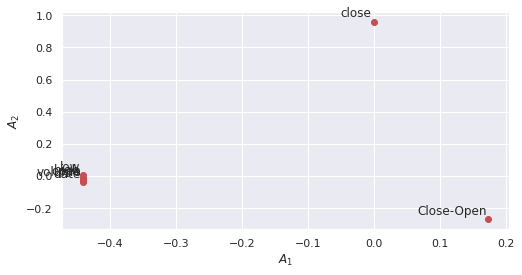

In [23]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


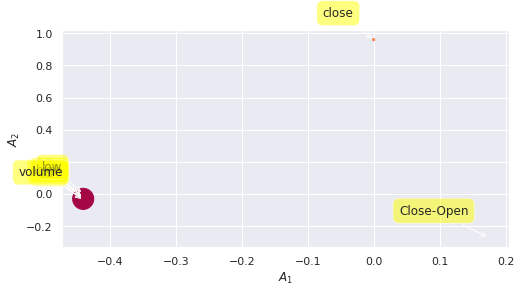

In [24]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([5.12815343e+00, 1.01352181e+00, 8.62375421e-01, 2.80301034e-03,
       3.00751743e-04, 1.06996998e-04, 3.22733835e-32])

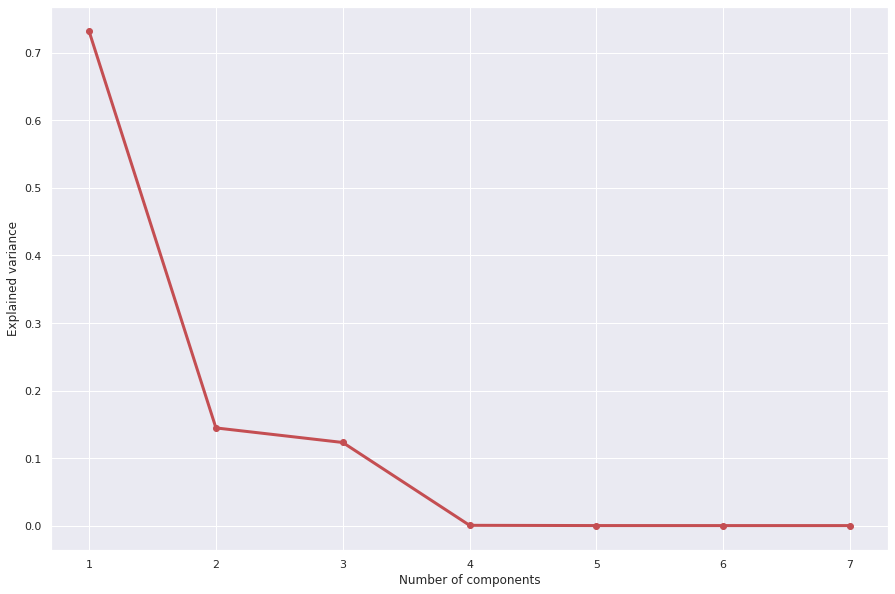

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

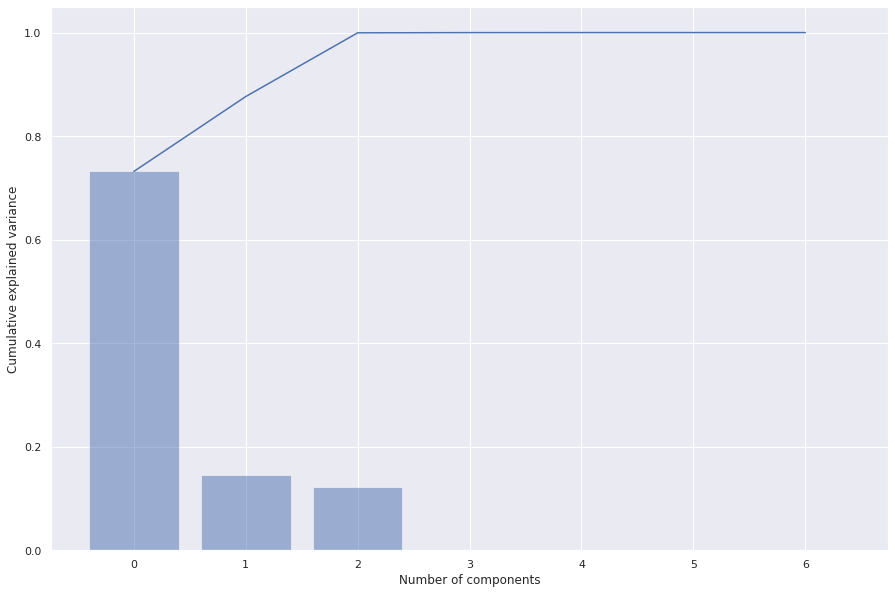

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 3.06030762e-01, -1.36774120e+00, -4.07631854e-02, -5.07765298e-01,
        6.24755337e-03,  2.34604953e-02,  1.24561714e-01,  7.33102109e-02,
       -6.68378781e-02,  4.49100000e-01,  2.96696712e-01,  2.87030980e-01,
       -7.61043794e-02, -3.01067604e-01,  1.94279065e-01,  5.05727085e-03,
        2.85880127e-01,  2.20901487e-01, -3.41787539e-01, -3.08221612e-01,
       -9.99507388e-02, -3.05053269e-02,  5.09230225e-01,  1.09319940e-01,
        5.83178684e-02, -1.38808875e-01,  3.70769698e-01,  5.84270373e-02,
        3.24797149e-01,  7.75526655e-02,  3.70330353e-01,  8.06907194e-02,
        4.44003818e-01,  2.52888709e-01,  2.40319905e-01,  4.64918903e-01,
        2.43789132e-01,  4.07722490e-01,  3.16399209e-01, -3.48819671e-02,
        2.37755699e-01,  1.41324758e-01,  2.27786165e-01,  2.37963919e-01,
        9.98784185e-03,  5.07680303e-01,  4.42695035e-01,  1.28356752e-01,
       -1.93490617e-02,  1.75355058e-01,  3.65545288e-02,  4.09994798e-01,
       -1.90667087e-01,  

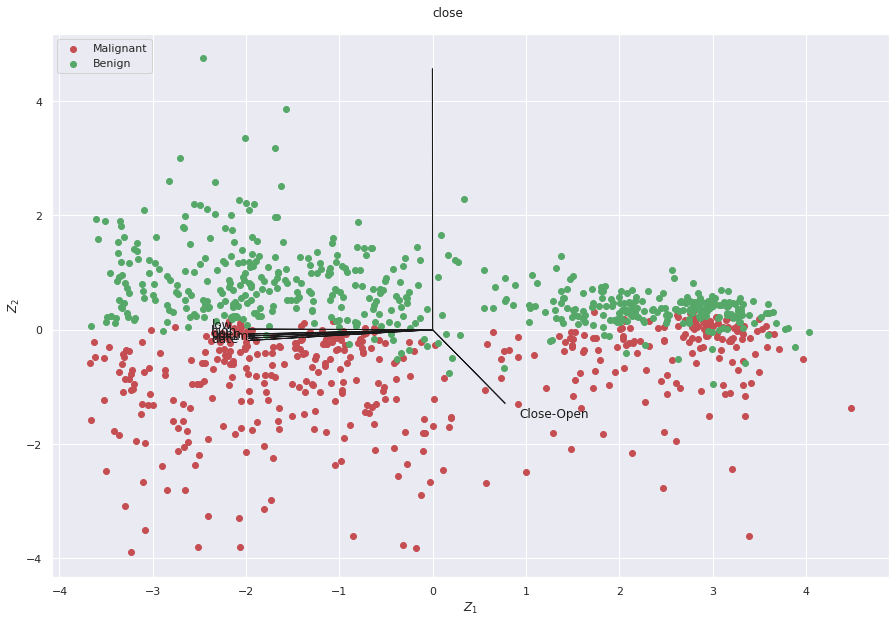

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [28]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=0950e722505b5ac49d2e5c3e11d71122175f82fb0ed77a6ba4664c8af23f16b6
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=9fcabeae1424d79e60075446490cd0dfa9352e0bef5d7c81f7920d0934c0b202
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [30]:
out['PC']

PC1       PC2       PC3
0    3.651790  0.306031  0.114692
1    4.482651 -1.367741  3.763577
2    4.031831 -0.040763  1.646772
3    3.970675 -0.507765  1.222344
4    3.772140  0.006248  0.321236
..        ...       ...       ...
960 -2.084393  1.171749 -0.020522
961 -2.225518  1.167990 -0.035328
962 -2.148905 -0.833602 -0.341516
963 -1.940606 -1.760714 -0.243042
964 -2.016036  3.358469  2.314072

[965 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f007dbc2fa0>)

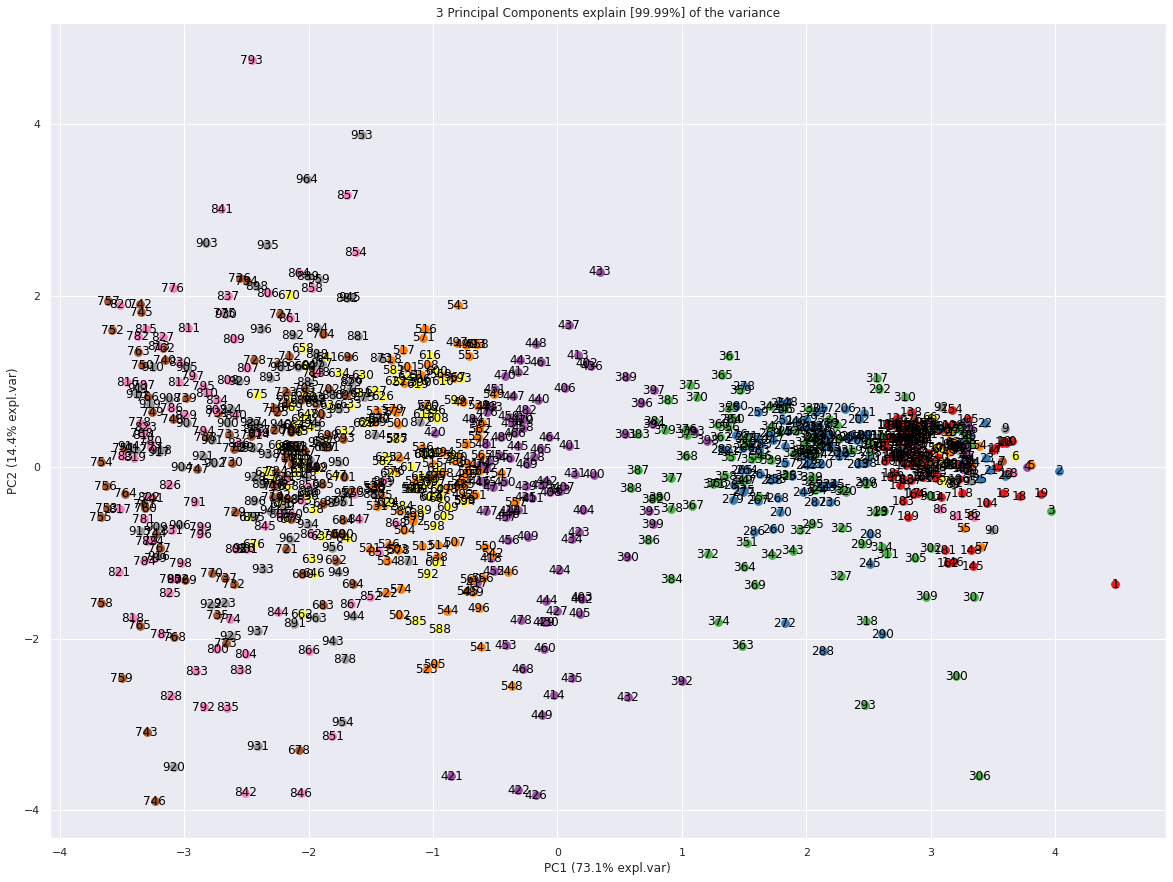

In [31]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [32]:
A = out['loadings'].T
A

PC1       PC2       PC3
open       -0.440541 -0.039719  0.068244
high       -0.440314 -0.023122  0.083579
low        -0.440902 -0.015920  0.063573
close      -0.440553  0.002378  0.080281
Close-Open -0.000518  0.960948  0.274814
volume      0.173089 -0.270630  0.946866
SMA7       -0.440005 -0.031114  0.076106

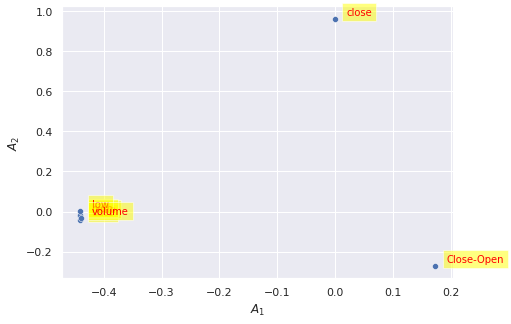

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

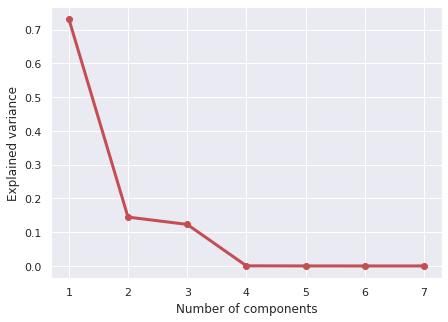

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

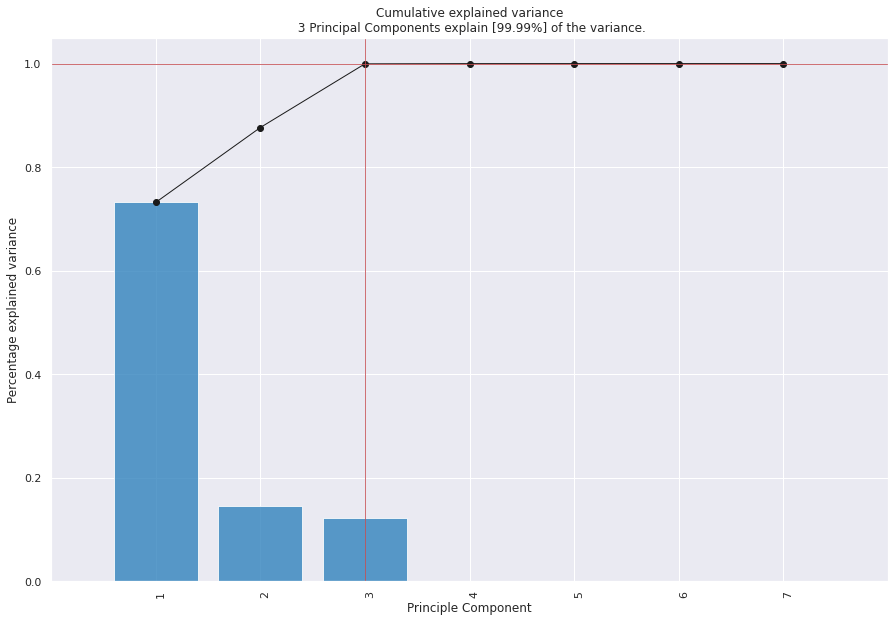

<Figure size 504x360 with 0 Axes>

In [35]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].


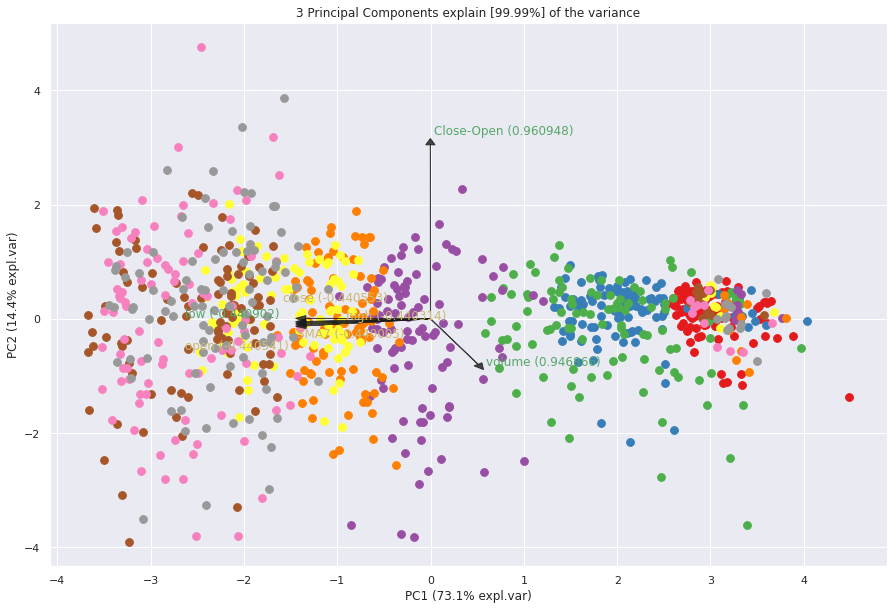

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f007c9d21c0>)

In [36]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].


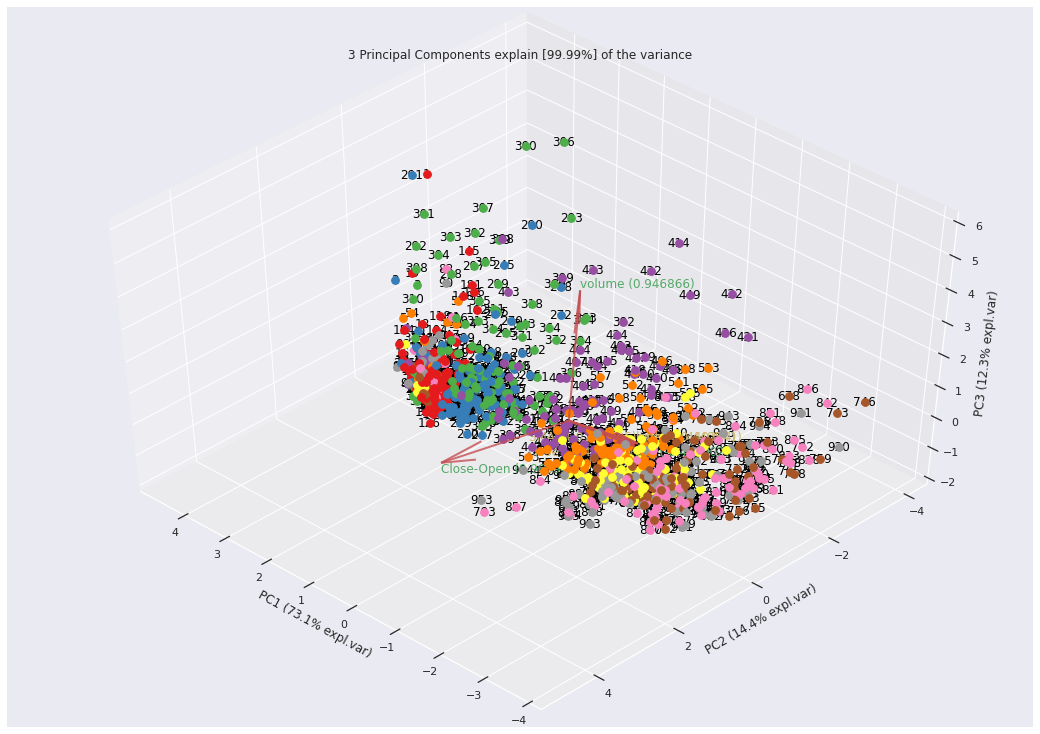

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f0079c95e20>)

In [37]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [39]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

ModuleNotFoundError: ignored

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (512, 6)
Unseen Data For Predictions: (57, 6)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='diagnosis', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (512, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (358, 4)
12                    Transformed Test Set          (154, 4)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4537
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9329  0.9843  0.9814  0.9193   
et                 Extra Trees Classifier    0.9190  0.9769  0.9587  0.9180   
gbc          Gradient Boosting Classifier    0.9133  0.9732  0.9398  0.9216   
qda       Quadratic Discriminant Analysis    0.9131  0.9754  0.9766  0.8952   
lightgbm  Light Gradient Boosting Machine    0.9107  0.9803  0.9307  0.9263   
rf               Random Forest Classifier    0.9106  0.9772  0.9398  0.9179   
ada                  Ada Boost Classifier    0.9079  0.9683  0.9305  0.9226   
dt               Decision Tree Classifier    0.9049  0.8931  0.9491  0.9052   
lr                    Logistic Regression    0.8967  0.9692  0.9262  0.9103   
ridge                    Ridge Classifier    0.8967  0.0000  0.9494  0.8926   
nb                            Naive Bayes    0.8910  0.9661  0.9491  0.8855   
knn                K Neighbors Classifier    0.8575  0.9198  0.9117  0.8629   
svm                   SVM - Linear Kernel    0.7878  0.0000  0.8632  0.8183   
dummy                    Dummy Classifier    0.6033  0.5000  1.0000  0.6033   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9472  0.8553  0.8662     0.010  
et        0.9356  0.8262  0.8358     0.411  
gbc       0.9292  0.8170  0.8217     0.075  
qda       0.9323  0.8118  0.8244     0.011  
lightgbm  0.9267  0.8118  0.8163     0.057  
rf        0.9267  0.8113  0.8175     0.449  
ada       0.9240  0.8060  0.8127     0.081  
dt        0.9246  0.7955  0.8037     0.011  
lr        0.9158  0.7814  0.7883     0.261  
ridge     0.9173  0.7792  0.7911     0.010  
nb        0.9133  0.7661  0.7789     0.012  
knn       0.8850  0.6970  0.7046     0.112  
svm       0.8134  0.5580  0.6019     0.010  
dummy     0.7525  0.0000  0.0000     0.010

In [ ]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

 Create a Model

**Logistic Regresssion**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8333  0.9708  0.9545  0.8077  0.8750  0.6301  0.6502
1       0.8056  0.9123  0.8636  0.8261  0.8444  0.5855  0.5866
2       0.8889  0.9351  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9444  0.9935  0.9545  0.9545  0.9545  0.8831  0.8831
4       0.8889  0.9903  0.8182  1.0000  0.9000  0.7778  0.7977
5       0.9444  0.9870  1.0000  0.9167  0.9565  0.8800  0.8864
6       0.9167  0.9937  0.9524  0.9091  0.9302  0.8269  0.8283
7       0.9444  0.9873  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8857  0.9252  0.9048  0.9048  0.9048  0.7619  0.7619
9       0.9143  0.9966  1.0000  0.8750  0.9333  0.8148  0.8292
Mean    0.8967  0.9692  0.9262  0.9103  0.9158  0.7814  0.7883
SD      0.0448  0.0306  0.0548  0.0608  0.0347  0.0982  0.0969

**Tune the model**

In [ ]:
tuned_lr=tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9708  0.9545  0.8400  0.8936  0.6959  0.7078
1       0.8333  0.9091  0.8636  0.8636  0.8636  0.6494  0.6494
2       0.8611  0.9383  0.8636  0.9048  0.8837  0.7115  0.7127
3       0.9444  0.9935  0.9091  1.0000  0.9524  0.8861  0.8919
4       0.8611  0.9903  0.7727  1.0000  0.8718  0.7256  0.7546
5       0.9444  0.9870  0.9545  0.9545  0.9545  0.8831  0.8831
6       0.9722  0.9937  0.9524  1.0000  0.9756  0.9434  0.9449
7       0.9167  0.9841  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.8857  0.9286  0.9048  0.9048  0.9048  0.7619  0.7619
9       0.9143  0.9932  1.0000  0.8750  0.9333  0.8148  0.8292
Mean    0.8994  0.9689  0.9032  0.9343  0.9156  0.7905  0.7981
SD      0.0434  0.0299  0.0627  0.0607  0.0362  0.0915  0.0903

In [ ]:
tuned_lr

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9708  0.9545  0.8400  0.8936  0.6959  0.7078
1       0.8333  0.8912  0.9545  0.8077  0.8750  0.6301  0.6502
2       0.7778  0.8701  0.8182  0.8182  0.8182  0.5325  0.5325
3       0.9444  0.9789  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9444  0.9708  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.8333  0.8864  0.9091  0.8333  0.8696  0.6400  0.6447
6       0.8056  0.8841  0.8571  0.8182  0.8372  0.5962  0.5971
7       0.8889  0.9381  0.9048  0.9048  0.9048  0.7714  0.7714
8       0.8000  0.8418  0.8095  0.8500  0.8293  0.5882  0.5893
9       0.8857  0.9660  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.8575  0.9198  0.9117  0.8629  0.8850  0.6970  0.7046
SD      0.0552  0.0479  0.0644  0.0571  0.0459  0.1159  0.1177

**Tune model with K-nearest neighbour**

In [ ]:
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9545  1.0000  0.8462  0.9167  0.7534  0.7774
1       0.8611  0.8929  1.0000  0.8148  0.8980  0.6875  0.7237
2       0.8889  0.8896  0.9545  0.8750  0.9130  0.7600  0.7655
3       0.9167  1.0000  1.0000  0.8800  0.9362  0.8176  0.8315
4       0.9444  0.9692  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9675  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.8333  0.9143  0.9048  0.8261  0.8636  0.6505  0.6549
7       0.9444  0.9810  0.9524  0.9524  0.9524  0.8857  0.8857
8       0.8571  0.8605  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.8857  0.9660  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.8937  0.9395  0.9626  0.8778  0.9165  0.7707  0.7837
SD      0.0352  0.0442  0.0409  0.0546  0.0275  0.0764  0.0737

In [ ]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Quadratic Discriminant Analysis**

In [ ]:
qda=create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9773  1.0000  0.8462  0.9167  0.7534  0.7774
1       0.9167  0.9448  1.0000  0.8800  0.9362  0.8176  0.8315
2       0.9167  0.9513  1.0000  0.8800  0.9362  0.8176  0.8315
3       0.9444  1.0000  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9444  0.9805  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  1.0000  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9167  0.9778  0.9524  0.9091  0.9302  0.8269  0.8283
7       0.9722  0.9937  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8286  0.9286  0.9524  0.8000  0.8696  0.6250  0.6455
9       0.8857  1.0000  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.9131  0.9754  0.9766  0.8952  0.9323  0.8118  0.8244
SD      0.0374  0.0243  0.0310  0.0615  0.0273  0.0836  0.0773

**Tune QDA Model**

In [ ]:
tuned_qda=tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9643  1.0000  0.8148  0.8980  0.6875  0.7237
1       0.8333  0.9318  0.8636  0.8636  0.8636  0.6494  0.6494
2       0.8889  0.9416  0.9545  0.8750  0.9130  0.7600  0.7655
3       0.9444  0.9903  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.8889  0.9805  0.8182  1.0000  0.9000  0.7778  0.7977
5       0.9167  0.9968  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.8889  0.9810  0.9524  0.8696  0.9091  0.7670  0.7722
7       0.9167  0.9841  0.9048  0.9500  0.9268  0.8302  0.8315
8       0.8857  0.9218  0.9524  0.8696  0.9091  0.7561  0.7618
9       0.8857  0.9966  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.8910  0.9689  0.9446  0.8879  0.9125  0.7675  0.7794
SD      0.0291  0.0262  0.0605  0.0514  0.0234  0.0633  0.0615

**Evaluate QDA Model**

In [ ]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (512, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (358, 3)
12                    Transformed Test Set          (154, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              dcb0
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9300  0.9852  0.9535  0.9349   
knn                K Neighbors Classifier    0.9161  0.9591  0.9537  0.9155   
qda       Quadratic Discriminant Analysis    0.9160  0.9823  0.9580  0.9125   
et                 Extra Trees Classifier    0.9134  0.9708  0.9491  0.9147   
nb                            Naive Bayes    0.9133  0.9769  0.9539  0.9117   
gbc          Gradient Boosting Classifier    0.9132  0.9695  0.9351  0.9273   
svm                   SVM - Linear Kernel    0.9106  0.0000  0.9400  0.9183   
ridge                    Ridge Classifier    0.9106  0.0000  0.9907  0.8828   
rf               Random Forest Classifier    0.9106  0.9714  0.9353  0.9210   
lightgbm  Light Gradient Boosting Machine    0.9106  0.9604  0.9305  0.9263   
lda          Linear Discriminant Analysis    0.9078  0.9849  0.9861  0.8828   
ada                  Ada Boost Classifier    0.8992  0.9661  0.9076  0.9281   
dt               Decision Tree Classifier    0.8770  0.8720  0.8931  0.9043   
dummy                    Dummy Classifier    0.6033  0.5000  1.0000  0.6033   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9427  0.8523  0.8565     0.035  
knn       0.9326  0.8213  0.8277     0.141  
qda       0.9326  0.8209  0.8289     0.022  
et        0.9297  0.8164  0.8238     0.490  
nb        0.9308  0.8148  0.8213     0.019  
gbc       0.9286  0.8171  0.8241     0.108  
svm       0.9275  0.8105  0.8151     0.027  
ridge     0.9318  0.8036  0.8217     0.016  
rf        0.9265  0.8120  0.8168     0.562  
lightgbm  0.9260  0.8123  0.8190     0.053  
lda       0.9293  0.7980  0.8165     0.016  
ada       0.9159  0.7897  0.7947     0.132  
dt        0.8971  0.7434  0.7471     0.016  
dummy     0.7525  0.0000  0.0000     0.012

# **Best model with PCA**

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9773  0.9545  0.8750  0.9130  0.7600  0.7655
1       0.8889  0.9578  0.9545  0.8750  0.9130  0.7600  0.7655
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9444  1.0000  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9444  0.9968  1.0000  0.9167  0.9565  0.8800  0.8864
6       0.9722  0.9968  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.9429  0.9626  0.9524  0.9524  0.9524  0.8810  0.8810
9       0.9429  0.9966  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9386  0.9852  0.9628  0.9403  0.9498  0.8701  0.8750
SD      0.0323  0.0168  0.0461  0.0463  0.0261  0.0695  0.0677

# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
lr_pca = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9805  0.9545  0.9130  0.9333  0.8224  0.8238
1       0.8889  0.9610  0.9545  0.8750  0.9130  0.7600  0.7655
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9444  0.9968  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9903  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9722  0.9968  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.8571  0.9626  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.9429  1.0000  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9300  0.9852  0.9535  0.9349  0.9427  0.8523  0.8565
SD      0.0385  0.0158  0.0472  0.0485  0.0313  0.0817  0.0814

# **Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9773  0.9545  0.8750  0.9130  0.7600  0.7655
1       0.8889  0.9578  0.9545  0.8750  0.9130  0.7600  0.7655
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9444  1.0000  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9444  0.9968  1.0000  0.9167  0.9565  0.8800  0.8864
6       0.9722  0.9968  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.9429  0.9626  0.9524  0.9524  0.9524  0.8810  0.8810
9       0.9429  0.9966  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9386  0.9852  0.9628  0.9403  0.9498  0.8701  0.8750
SD      0.0323  0.0168  0.0461  0.0463  0.0261  0.0695  0.0677

# **Evaluate Model**

In [ ]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [ ]:
knn_pca = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9594  0.9545  0.8400  0.8936  0.6959  0.7078
1       0.8889  0.9156  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.8889  0.9383  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9722  0.9578  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.9444  0.9968  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9854  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9444  0.9603  1.0000  0.9130  0.9545  0.8835  0.8896
7       0.9444  0.9714  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8571  0.9269  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.9429  0.9796  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9161  0.9591  0.9537  0.9155  0.9326  0.8213  0.8277
SD      0.0378  0.0246  0.0416  0.0541  0.0290  0.0827  0.0810

# **Tune Model**

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9821  0.9545  0.8750  0.9130  0.7600  0.7655
1       0.9167  0.9188  1.0000  0.8800  0.9362  0.8176  0.8315
2       0.9167  0.9334  0.9545  0.9130  0.9333  0.8224  0.8238
3       0.9722  0.9935  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.8889  1.0000  0.8182  1.0000  0.9000  0.7778  0.7977
5       0.9167  0.9919  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9722  0.9952  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9722  0.9968  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8857  0.9524  1.0000  0.8400  0.9130  0.7500  0.7746
9       0.9714  0.9983  1.0000  0.9545  0.9767  0.9398  0.9415
Mean    0.9302  0.9763  0.9634  0.9287  0.9436  0.8516  0.8590
SD      0.0360  0.0285  0.0530  0.0509  0.0290  0.0771  0.0716

In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [ ]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9740  1.0000  0.8800  0.9362  0.8176  0.8315
1       0.8611  0.9513  0.9545  0.8400  0.8936  0.6959  0.7078
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       0.9722  1.0000  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.9167  0.9968  0.8636  1.0000  0.9268  0.8312  0.8433
5       0.9167  0.9903  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9167  0.9937  0.9524  0.9091  0.9302  0.8269  0.8283
7       0.9444  1.0000  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8571  0.9626  0.9524  0.8333  0.8889  0.6914  0.7035
9       0.9143  0.9898  0.9524  0.9091  0.9302  0.8193  0.8208
Mean    0.9160  0.9823  0.9580  0.9125  0.9326  0.8209  0.8289
SD      0.0336  0.0168  0.0435  0.0556  0.0253  0.0741  0.0714

# **Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9805  1.0000  0.8800  0.9362  0.8176  0.8315
1       0.8889  0.9513  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.9167  0.9643  1.0000  0.8800  0.9362  0.8176  0.8315
3       0.9444  1.0000  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9167  1.0000  0.8636  1.0000  0.9268  0.8312  0.8433
5       0.9167  0.9903  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9444  0.9968  1.0000  0.9130  0.9545  0.8835  0.8896
7       0.9722  1.0000  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8286  0.9592  0.9524  0.8000  0.8696  0.6250  0.6455
9       0.9143  0.9898  1.0000  0.8750  0.9333  0.8148  0.8292
Mean    0.9160  0.9832  0.9768  0.8991  0.9342  0.8184  0.8311
SD      0.0363  0.0176  0.0422  0.0593  0.0268  0.0809  0.0754

# **Evaluate Model**

In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9773  0.9545  0.9130  0.9333  0.8224  0.8238
1       0.8889  0.9448  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.8889  0.9416  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9444  0.9935  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9444  0.9903  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.8889  0.9870  0.9091  0.9091  0.9091  0.7662  0.7662
6       0.9444  0.9921  0.9524  0.9524  0.9524  0.8857  0.8857
7       0.8889  0.9651  0.8571  0.9474  0.9000  0.7757  0.7806
8       0.8857  0.9269  1.0000  0.8400  0.9130  0.7500  0.7746
9       0.9429  0.9898  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9134  0.9708  0.9491  0.9147  0.9297  0.8164  0.8238
SD      0.0263  0.0235  0.0486  0.0448  0.0213  0.0571  0.0540

In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9444  0.9870  0.9545  0.9545  0.9545  0.8831  0.8831
1       0.8611  0.9643  0.9091  0.8696  0.8889  0.7039  0.7052
2       0.8611  0.9610  0.8636  0.9048  0.8837  0.7115  0.7127
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  1.0000  0.8182  1.0000  0.9000  0.7778  0.7977
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9444  0.9968  0.9524  0.9524  0.9524  0.8857  0.8857
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.9429  0.9592  0.9524  0.9524  0.9524  0.8810  0.8810
9       0.9714  1.0000  1.0000  0.9545  0.9767  0.9398  0.9415
Mean    0.9331  0.9868  0.9307  0.9588  0.9432  0.8616  0.8652
SD      0.0483  0.0170  0.0624  0.0422  0.0408  0.1005  0.0985

In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 6.9 MB/s 


In [ ]:
import shap

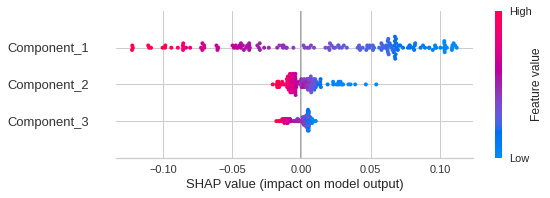

In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')